# SVM - exemplos iniciais
comparativo entre SVM Linear e SVM Não-linear, com base em exemplos de duas classes de pétalas de Iris Versiculor e Iris Setosa.

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
# Importa a biblioteca Matplotlib para criar gráficos.
import matplotlib.pyplot as plt

# Configura os parâmetros de estilo e tamanho de fonte para os elementos dos gráficos.

# Define o tamanho da fonte geral para 14.
plt.rc('font', size=14)

# Define o tamanho da fonte para rótulos dos eixos (xlabel e ylabel), títulos (title) e legendas (legend) como 14.
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)

# Define o tamanho da fonte para rótulos dos eixos x e y (xtick e ytick) como 10.
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [4]:
# Importa a classe Path do módulo pathlib para manipular caminhos de arquivos e diretórios.
from pathlib import Path

# Define o caminho onde as imagens serão salvas. O caminho é construído como "images/svm" a partir do diretório atual.
IMAGES_PATH = Path() / "images" / "svm"

# Cria o diretório "images/svm" e quaisquer diretórios pais, se necessário.
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Define uma função chamada "save_fig" para salvar uma figura em um arquivo.
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Salva a figura em um arquivo.
    """

    # Define o caminho do arquivo de imagem a partir do caminho IMAGES_PATH e do nome da figura.
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    # Se "tight_layout" for True, ajusta o layout da figura para otimizar o espaçamento dos elementos.
    if tight_layout:
        plt.tight_layout()

    # Salva a figura no arquivo especificado, com a extensão e resolução definidas.
    plt.savefig(path, format=fig_extension, dpi=resolution)


# SVM Linear

O SVM Linear é um algoritmo que utiliza um hiperplano linear para separar classes de dados. Ele parte do pressuposto de que os dados são linearmente separáveis. Em um exemplo prático, como a distinção entre as classes Iris Versicolor e Iris Setosa com base nas medidas de pétalas, o SVM Linear procura encontrar a melhor linha reta que pode ser desenhada para separar essas duas classes de forma mais eficaz. Isso significa que ele tenta traçar uma linha reta no espaço de características que maximize a margem entre as duas classes, permitindo uma separação clara.

# Comparação entre SVM Linear e SVM Não-linear:
SVM Linear:
A SVM Linear assume que as classes de dados podem ser linearmente separáveis no espaço de recursos. Isso significa que é possível traçar uma linha reta (em um problema de classificação bidimensional) ou um hiperplano (em um problema de classificação de alta dimensão) que separe perfeitamente as duas classes. Para esses casos, podemos usar o exemplo de duas classes de pétalas de Iris: Iris Versicolor e Iris Setosa. 

SVM Não-linear:
Em alguns casos, os dados podem não ser linearmente separáveis no espaço de recursos. Isso significa que não é possível traçar uma linha reta ou um hiperplano que separe perfeitamente as duas classes. Para esses casos, podemos usar o conceito de kernels.

# SVM Linear 
O SVM Linear é mais adequado quando os dados são linearmente separáveis, ou seja, quando uma linha 
reta é suficiente para separar as classes de dados. Ele é computacionalmente mais eficiente e mais 
fácil de interpretar. No entanto, quando os dados não são linearmente separáveis, o SVM Linear pode não 
ser capaz de encontrar uma separação eficiente.

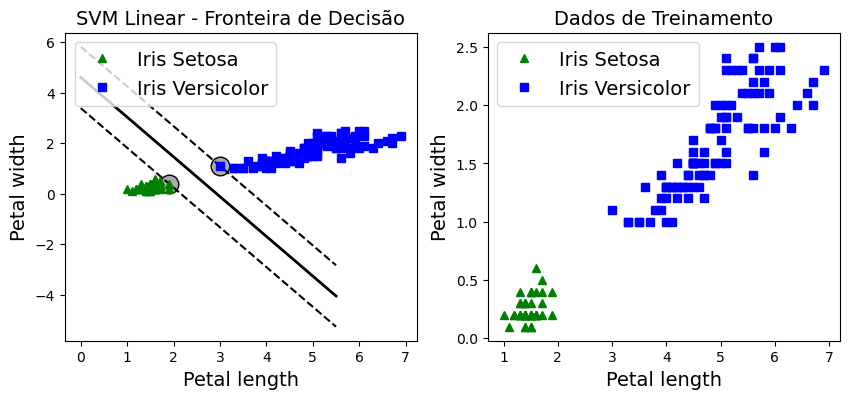

In [5]:
# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt  # Para criar gráficos
import numpy as np  # Para operações numéricas
from sklearn.svm import SVC  # Para criar um classificador SVM
from sklearn import datasets  # Para carregar o conjunto de dados Iris

# Carrega o conjunto de dados Iris
iris = datasets.load_iris()

# Extrai as características de comprimento e largura da pétala do conjunto de dados
X = iris.data[:, 2:4]  # Usamos as duas últimas características (comprimento e largura da pétala)

# Extrai os rótulos alvo do dataset para distinguir entre Iris Setosa (classe 0) e Iris Versicolor (classe 1)
y = (iris.target == 0).astype(int)  # Transforma 0 em 1 e 1 em 0 para criar uma classificação binária

# Cria um classificador SVM com kernel linear e um valor de regularização C elevado.
svm_clf = SVC(kernel="linear", C=1e5)

# Treina o classificador SVM com os dados de treinamento X e os rótulos y.
svm_clf.fit(X, y)

# Define a função "plot_svc_decision_boundary" para plotar a fronteira de decisão do SVM.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Extrai os coeficientes e o termo de interceptação do SVM treinado.
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Calcula a equação da fronteira de decisão linear: w0*x0 + w1*x1 + b = 0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    # Extrai os vetores de suporte do SVM treinado.
    svs = svm_clf.support_vectors_

    # Plota a fronteira de decisão e os vetores de suporte.
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, decision_boundary + 1/w[1], "k--")
    plt.plot(x0, decision_boundary - 1/w[1], "k--")
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', edgecolors='k')

# Cria uma figura para visualizar os resultados.
plt.figure(figsize=(10, 4))

# Primeiro gráfico: fronteira de decisão do SVM
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris Setosa")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris Versicolor")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("SVM Linear - Fronteira de Decisão")

# Segundo gráfico: dados de treinamento
plt.subplot(122)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris Setosa")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris Versicolor")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("Dados de Treinamento")

plt.show()



A plotagem mostra parte do conjunto de dados da íris, as duas classes podem ser separadas facilmente com uma linha reta (elas são separadas linearmente). A plotagem à esquerda mostra os limites de decisão de três possíveis classificadores lineares. O modelo cujo limite de decisão é representado pela linha tracejada é tão ruim que nem sequer consegue separar as classes corretamente. Os outros dois modelos funcionam perfeitamente neste conjunto, mas seus limites de
decisão chegam tão perto das instâncias que provavelmente não funcionarão tão bem em novas instâncias. Em contraste, a linha contínua na plotagem à direita representa o limite de decisão de um classificador SVM; esta linha não somente separa as duas classes, mas também fica o mais longe possível das instâncias de treinamento mais próximas.
Você pode pensar em um classificador SVM como o preenchimento da via mais larga possível entre as classes (representada pelas linhas tracejadas paralelas). Isso é chamado de classificação de margens largas. 
Observe que adicionar mais instâncias de treinamento “fora da via” não afeta o limite de decisão: ele está totalmente determinado (ou “suportado”) pelas instâncias localizadas na borda da via.

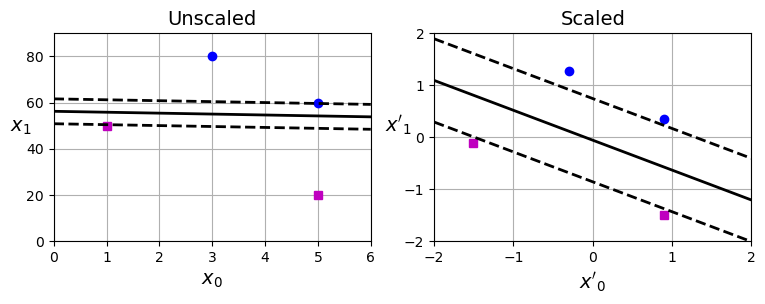

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define uma função para plotar a fronteira de decisão do SVM linear
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Cria um conjunto de dados de exemplo Xs com duas características e um vetor de rótulos ys.
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Cria um classificador SVM linear (svm_clf) com C=100 e treina-o com os dados Xs e ys.
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# Cria uma instância do StandardScaler (scaler) para escalar os recursos.
scaler = StandardScaler()

# Usa o scaler para padronizar (escalar) os dados Xs e armazena-os em X_scaled.
X_scaled = scaler.fit_transform(Xs)

# Cria um segundo classificador SVM linear (svm_clf_scaled) com C=100 e treina-o com os dados escalados X_scaled e ys.
svm_clf_scaled = SVC(kernel="linear", C=100)
svm_clf_scaled.fit(X_scaled, ys)

# Plota duas sub-figuras, uma para os dados não escalados e outra para os dados escalados.
plt.figure(figsize=(9, 2.7))
plt.subplot(121)
# Plota os pontos de dados para as duas classes, bem como a fronteira de decisão do SVM não escalado.
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
# Plota os pontos de dados para as duas classes, bem como a fronteira de decisão do SVM com dados escalados.
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

# Exibe a figura que mostra a sensibilidade às escalas dos recursos.
plt.show()



As Máquinas de Vetores de Suporte (SVM) são sensíveis à escala das características, como podemos observar na plotagem à esquerda. Nesse gráfico, a escala vertical é muito maior do que a escala horizontal, o que resulta em uma via de decisão mais larga que se alinha quase horizontalmente. No entanto, após o escalonamento das características, por exemplo, usando o StandardScaler do Scikit-Learn, o limite de decisão melhora significativamente, como ilustrado na plotagem à direita.

O escalonamento das características é uma etapa crítica ao trabalhar com algoritmos de SVM, pois ajuda a garantir que todas as características tenham um impacto igual na determinação do limite de decisão. Sem esse escalonamento, características com escalas maiores podem dominar o processo de treinamento e tornar o modelo insensível a características com escalas menores. Portanto, o escalonamento adequado, como o realizado pelo StandardScaler, desempenha um papel fundamental na obtenção de resultados mais precisos e eficazes ao usar SVM, como exemplificado pela melhora na plotagem à direita.

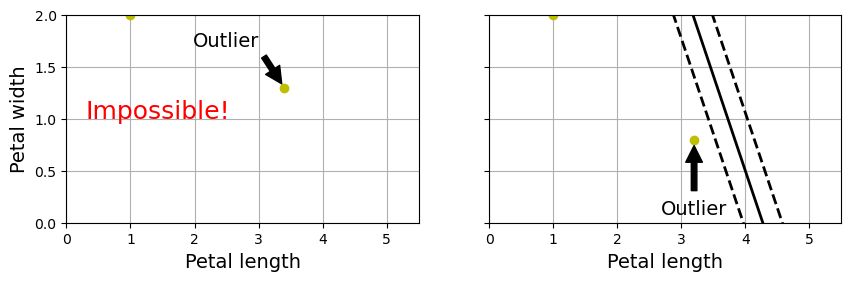

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define os dados originais
X = np.array([[1, 2], [2, 3], [3, 3.5], [4, 4], [5, 4.5]])
y = np.array([0, 0, 1, 1, 1])

# Define um conjunto de pontos de dados outliers (X_outliers) e seus rótulos (y_outliers).
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# Cria dois novos conjuntos de dados adicionando os outliers ao conjunto original.
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Cria um novo classificador SVM (svm_clf2) com kernel linear e um valor de regularização C muito grande (10^9).
svm_clf2 = SVC(kernel="linear", C=1e9)

# Treina o classificador SVM (svm_clf2) com os dados que incluem outliers (Xo2 e yo2).
svm_clf2.fit(Xo2, yo2)

# Define uma função para plotar a fronteira de decisão do SVM linear
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Cria uma figura com duas sub-figuras para visualizar os resultados.
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Primeira sub-figura: visualiza os dados, incluindo um outlier impossível.
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Segunda sub-figura: visualiza os dados com um outlier e a fronteira de decisão do SVM treinado com outliers.
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Exibe a figura.
plt.show()


os gráficos mostram o conjunto de dados da íris com apenas um outlier adicional: à esquerda, é impossível encontrar uma margem rígida e, à direita, a fronteira de decisão termina bem diferente do que vimos sem o outlier, e provavelmente não generalizará tão bem. É preferível utilizar um modelo mais flexível a fim de evitar esses problemas. O objetivo
é encontrar um bom equilíbrio entre manter a via o mais larga possível e limitar as violações de margem (ou seja, as instâncias que acabam no meio da via ou mesmo do lado errado). Isto é chamado classificação de margem suave.

In [28]:
# Importa as bibliotecas necessárias.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Carrega o conjunto de dados Iris e armazena-o em "iris" com a opção "as_frame=True".
iris = load_iris(as_frame=True)

# Extrai as características "petal length (cm)" e "petal width (cm)" do conjunto de dados 
#Iris e as armazena em "X".
X = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Define os rótulos "y" com base na classe "Iris virginica" (classe 2). Isso cria um vetor de
#booleanos onde True representa "Iris virginica".
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))

# Treina o classificador SVM com os dados de características padronizadas "X" e os rótulos "y".
svm_clf.fit(X, y)


C:\Users\bryen\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [29]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [30]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

C:\Users\bryen\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\bryen\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


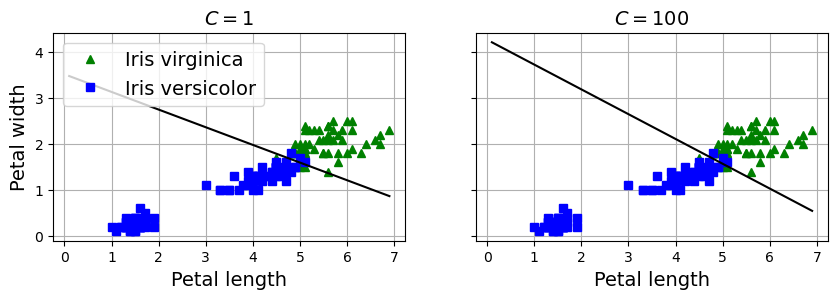

In [31]:
# Importação das bibliotecas necessárias
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Cria um objeto StandardScaler para padronizar os dados.
scaler = StandardScaler()

# Cria dois classificadores SVM com diferentes valores de C.
svm_clf1 = LinearSVC(C=1, max_iter=10000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10000, random_state=42)

# Cria pipelines para aplicar o escalonamento e treinamento dos modelos.
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

# Treina os modelos com os dados X e y.
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Converte os parâmetros do modelo para valores adequados.
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Calcula t para identificar os vetores de suporte.
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Cria um gráfico para visualizar as fronteiras de decisão das SVMs.
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")

# Define uma função para plotar a fronteira de decisão do SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # A reta da fronteira de decisão é w0*x + w1*y + b = 0.
    # Para plotar a fronteira de decisão, resolvemos para y.
    y = (-w[0] * xmin - b) / w[1]
    y2 = (-w[0] * xmax - b) / w[1]

    plt.plot([xmin, xmax], [y, y2], "k-")

# Chama a função para plotar a fronteira de decisão do primeiro modelo SVM.
plot_svc_decision_boundary(svm_clf1, X.min(), X.max())
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")

# Chama a função para plotar a fronteira de decisão do segundo modelo SVM.
plot_svc_decision_boundary(svm_clf2, X.min(), X.max())
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.grid()





Nas classes SVM do Scikit-Learn você controla o equilíbrio ao utilizar o hiperparâmetro C: um valor menor de C leva a uma via mais larga, mas com mais violações das margens. A Figura mostra os limites de decisão e as margens de dois classificadores SVM de margem suave em um conjunto de dados não linearmente separáveis. À esquerda, ao utilizar um alto valor de C, o classificador faz menos violações na margem, mas fica com uma margem menor. À direita, ao utilizar um baixo valor de C, a margem fica muito maior, mas muitas instâncias ficam na via. No entanto, parece provável que o segundo
classificador generalizará melhor na verdade, mesmo neste conjunto de treinamento ele comete menos erros de previsão já que a maioria das violações da margem está do lado correto do limite de decisão. 


# SVM Não-linear:
O SVM Não-linear permite encontrar hiperplanos de decisão que não são lineares no espaço de características original. Ele utiliza transformações não-lineares nos dados originais para projetá-los em um espaço de características de maior dimensionalidade, onde é possível encontrar um hiperplano linear de separação. O SVM Não-linear é mais flexível, pois permite encontrar hiperplanos de decisão não-lineares através da utilização de funções de kernel, como o kernel polinomial utilizado no exemplo. Ele é capaz de lidar com dados que não podem ser separados linearmente no espaço de características original. No entanto, o SVM Não-linear pode ser mais computacionalmente exigente e pode ter um maior risco de overfitting quando o grau do kernel é muito alto.

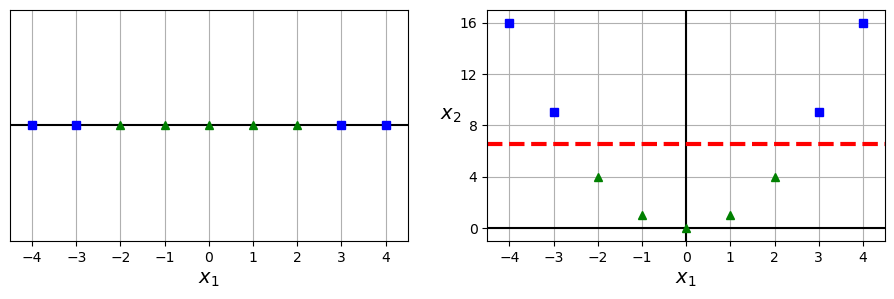

In [20]:


# Cria um conjunto de dados unidimensional "X1D" consistindo de valores no intervalo d
#e -4 a 4, com 9 pontos uniformemente espaçados.
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# Cria um conjunto de dados bidimensional "X2D" adicionando uma segunda dimensão aos pontos em "X1D" elevando ao quadrado.
X2D = np.c_[X1D, X1D**2]

# Define os rótulos "y" para o conjunto de dados. A classe 0 tem 4 pontos e a classe 1 tem 5 pontos.
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# Cria uma figura com duas sub-figuras, uma com um gráfico unidimensional e outra com um gráfico bidimensional.
plt.figure(figsize=(10, 3))

# Primeira sub-figura: gráfico unidimensional.
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")  # Plota pontos da classe 0 (azul quadrado).
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")  # Plota pontos da classe 1 (verde triângulo).
plt.gca().get_yaxis().set_ticks([])  # Remove rótulos do eixo y.
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

# Segunda sub-figura: gráfico bidimensional.
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")  # Plota pontos da classe 0 (azul quadrado).
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")  # Plota pontos da classe 1 (verde triângulo).
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])  # Define rótulos específicos no eixo y.
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # Plota uma linha pontilhada vermelha.
plt.axis([-4.5, 4.5, -1, 17])  # Define limites do gráfico.

# Ajusta a posição das sub-figuras para evitar sobreposição.
plt.subplots_adjust(right=1)

# Salva a figura em um arquivo com um nome específico (higher_dimensions_plot).
save_fig("higher_dimensions_plot", tight_layout=False)

# Exibe a figura.
plt.show()


Os gráficos representam um conjunto de dados simples com uma única característica, x1. Como é evidente, esse conjunto de dados não apresenta uma separação linear clara entre as classes. No entanto, a ideia por trás da transformação polinomial é adicionar uma segunda característica, x2 = (x1)², criando assim um conjunto de dados 2D no qual as classes se tornam linearmente separáveis. Essa transformação é fundamental porque, ao introduzir essa característica quadrática (x2), as amostras agora podem ser separadas por uma linha reta nesse espaço de características expandido. Portanto, o modelo LinearSVC pode ser aplicado com sucesso neste espaço de características 2D para classificar as amostras, mesmo que a separação no espaço original fosse impossível de ser feita de forma linear. Isso demonstra como a expansão polinomial de características pode ser uma estratégia poderosa para lidar com problemas de classificação não lineares.

In [21]:
# Importa a função "make_moons" do módulo "sklearn.datasets" para gerar um conjunto de dados com duas meias-luas.
# O conjunto de dados é criado com 100 amostras, ruído de 0.15 e uma semente aleatória para reprodutibilidade.
from sklearn.datasets import make_moons

# Importa a classe "PolynomialFeatures" do módulo "sklearn.preprocessing" para gerar características polinomiais.
from sklearn.preprocessing import PolynomialFeatures

# Gera um conjunto de dados com duas meias-luas usando a função "make_moons" e o armazena em "X" e "y".
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

# Treina o classificador SVM com recursos polinomiais no conjunto de dados "X" e rótulos "y".
polynomial_svm_clf.fit(X, y)


C:\Users\bryen\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

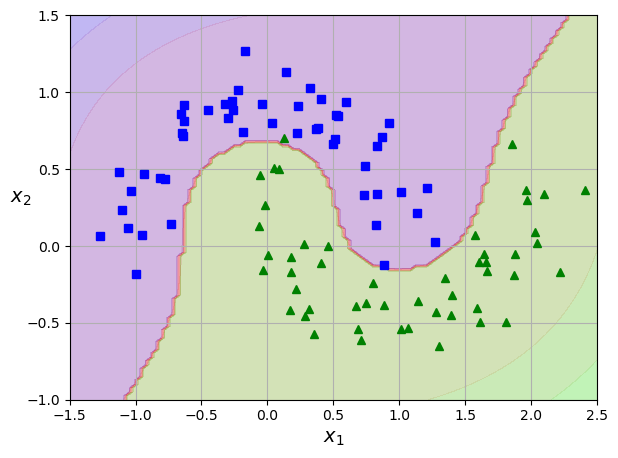

In [22]:
# Define uma função chamada "plot_dataset" para plotar um conjunto de dados.
def plot_dataset(X, y, axes):
    """
    Plota um conjunto de dados com rótulos diferentes em um gráfico.
    """
    # Plota pontos de dados pertencentes à classe 0 (y==0) como quadrados azuis.
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    
    # Plota pontos de dados pertencentes à classe 1 (y==1) como triângulos verdes.
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    
    # Define os limites do gráfico conforme especificado em "axes".
    plt.axis(axes)
    
    # Habilita a grade do gráfico.
    plt.grid(True)
    
    # Define os rótulos dos eixos x e y.
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

# Define uma função chamada "plot_predictions" para plotar as previsões de um classificador.
def plot_predictions(clf, axes):
    """
    Plota as previsões de um classificador em um gráfico.
    """
    # Cria uma grade de valores de x0s e x1s com base nos limites especificados em "axes".
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    
    # Combina os valores de x0 e x1 em um conjunto de características X.
    X = np.c_[x0.ravel(), x1.ravel()]
    
    # Realiza previsões com o classificador no conjunto de características X.
    y_pred = clf.predict(X).reshape(x0.shape)
    
    # Obtém os valores da função de decisão do classificador.
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    # Plota áreas preenchidas de acordo com as previsões.
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    
    # Plota as linhas de decisão do classificador.
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Chama a função "plot_predictions" para visualizar as previsões de um classificador (polynomial_svm_clf).
# Em seguida, chama a função "plot_dataset" para plotar o conjunto de dados (X e y).
# Finalmente, a figura é salva e exibida.
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
save_fig("moons_polynomial_svc_plot")
plt.show()


Para implementar essa abordagem com o Scikit-Learn, pode-se criar um Pipeline que inclua um transformador PolynomialFeatures (que é discutido no contexto de "Regressão Polinomial"), seguido por um StandardScaler e um LinearSVC. Isso pode ser aplicado e testado em um conjunto de dados que se assemelhe ao formato de luas, como o gráfico que foi apresentado anteriormente. O Pipeline é uma ferramenta útil para automatizar o fluxo de trabalho de processamento de dados e treinamento de modelos, permitindo que você encadeie várias etapas, como a expansão polinomial das características, a padronização e o treinamento do modelo LinearSVC, de forma eficiente e organizada. Isso pode ser particularmente útil em tarefas de classificação onde a fronteira de decisão não é linear e uma transformação polinomial pode ajudar a melhorar o desempenho do modelo.